# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
from scipy import stats
from scipy.stats import binom

import numpy as np

from scipy.stats import poisson

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon

from scipy.stats import poisson

import scipy.stats as sct
from numpy import random

from scipy.stats import bernoulli

In [6]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.34541921 2.24135565 2.0260577  2.42096478 2.72762532 2.80366321
 2.74419224 2.66822191 2.55286634 2.01578891]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [7]:
# your code here

def uniformly(botton, ceiling, count):
    x= uniform.rvs(size = count)
    return botton + (ceiling -botton)*x # a is my botton and b is my celing
   # plt.hist(x, range= (0,10))
    
#Ana´s way:

#def uni(botton, ceiling, count):
#    return np.random.uniform(botton, ceiling, size= count)
   # plt.hist(x, range= (0,10))
    

How are the two distributions different?

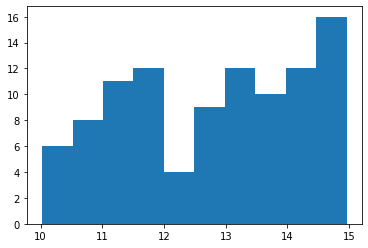

In [8]:
# your answer here:

#Call your function with 2 sets of params below:

#bottom=10, ceiling=15, count=100
#bottom=10, ceiling=60, count=1,000
#plot the uniform distributions generated above using histograms
#Let the histogram's number of bins be 10.


distribution1 = uniformly(10,15,100)
distribution2 = uniformly(10,60,1000)

plt.hist(distribution1, bins = 10)

plt.show()


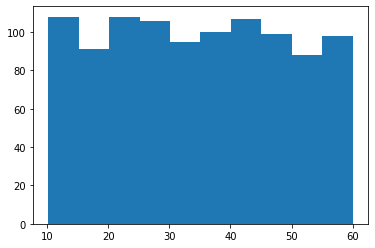

In [20]:
plt.hist(distribution2, bins = 10)

plt.show()

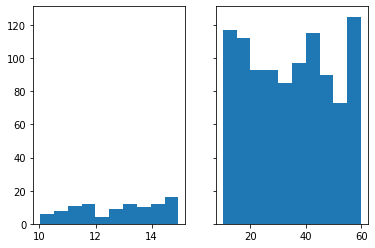

In [9]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].hist(distribution1)
ax[1].hist(distribution2)
plt.show()


#in this i didnt put the bin, and its the same, is that ok?


In [10]:
#in both cases, a see the same kind of distribution, but with different scales. 



## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

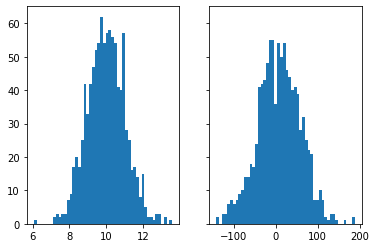

In [11]:
# your code here


distribution3 = norm.rvs(loc=10, scale=1, size=1000) #i started with 100, but the graph wans´t equal the image, and in this case i needed to use the bins.
distribution4 = norm.rvs(loc=10, scale=50, size =1000)

fig, ax = plt.subplots(1,2, sharey=True)
ax[0].hist(distribution3, bins= 50)
ax[1].hist(distribution4, bins=50)
plt.show()



#class example:
#normal= norm.rvs(loc=3, scale=1, size =1000000) #loc is the average scale is the deviation
#print(normal)
#plt.hist(normal, bins=100)
#plt.show()

How are the two distributions different?

In [ ]:
# your answer here:
#with a bigger scale the second graph brings me a higher range between the valeus, but both have the same behavior.



## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

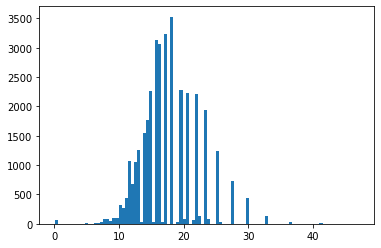

In [12]:
# your code here
vehicles = pd.read_csv('vehicles.csv')

plt.hist(vehicles["Fuel Barrels/Year"], bins =100) #started with a bin =50
plt.show()

2. CO2 Emission Grams/Mile 

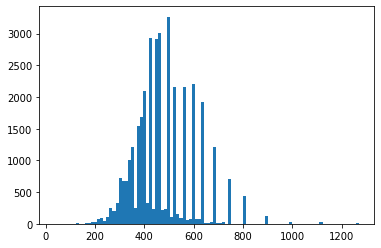

In [13]:
# your code here
plt.hist(vehicles["CO2 Emission Grams/Mile"], bins =100)
plt.show()

3. Combined MPG

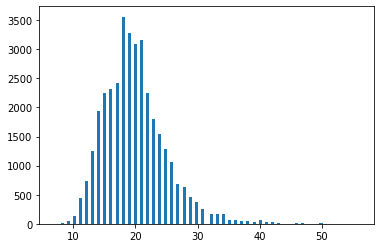

In [14]:
# your code here

plt.hist(vehicles['Combined MPG'], bins =100)
plt.show()


Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# you answer here:

I belive that the 'Combined MPG' is the nearly normally distributed, because is that one that brings more frequencie/ occurance around the what its probaly my mean.


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [15]:
# your code here


# 1 a function that returns a list of numbers exponentially distributed with the mean of 10.

def expo(mean,size):
    return np.random.exponential(mean, size) #i used numpy.random.exponential and a error was given.
    #return norm.rvs(loc=, scale=, size =)
    



In [16]:
# 2 generate two number sequences with a mean of 1 and 100 and a size of 1000.

distribution5 = expo(1,1000)
distribution6 = expo(100,1000)


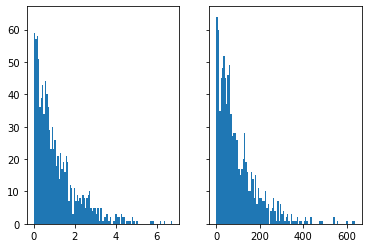

In [17]:
#3 Plot the distributions as histograms with the number of bins as 100.

fig, ax = plt.subplots(1,2, sharey=True)

ax[0].hist(distribution5, bins = 100)
ax[1].hist(distribution6, bins = 100)
plt.show()

How are the two distributions different?

In [ ]:
# your answer here:

they are not, visualy, they have the same behavior (a exponential one) despite the different means.


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [20]:
# your answer here
# Hint: This is same as saying P(x<15)
#spend less than fifteen minutes in the bank?

# 10 minutes (i.e. λ = 1/10)

from scipy.stats import expon

probab15 = expon.cdf(15, 1/10) #i get it that is exponential, but not the reason that is cumulative.
probab15




0.9999996619256516

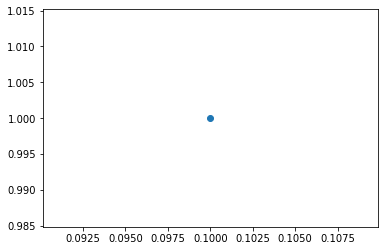

In [22]:
#x = (1/10)
#p = (probab15)


#plt.scatter(x,np.cumsum(p)) #tried to plt but didn´t get it ... can you help me please?

What is the probability that the customer will spend more than 15 minutes

In [2]:
# your answer here
probabmore15 = 1 - expon.cdf(15, 1/10) #i get it that is exponential, but not the reason that is cumulative.
probabmore15

3.3807434840493755e-07